In [1]:
from google.colab import files
uploaded = files.upload()


Saving data.zip to data.zip


In [2]:
import zipfile
import os


zip_path = "data.zip"
extract_to = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


os.listdir(os.path.join(extract_to, "data"))


['y.RData',
 '.RData',
 'X.csv',
 'y.csv',
 'read_data.R',
 'time.RData',
 '.Rhistory',
 'time.csv',
 '.DS_Store',
 'X.RData']

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "/content/data/data"
x_df = pd.read_csv(f"{base_path}/X.csv")
y_df = pd.read_csv(f"{base_path}/y.csv")
time_df = pd.read_csv(f"{base_path}/time.csv")


In [4]:
df = pd.concat([time_df, x_df, y_df], axis=1)

In [5]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

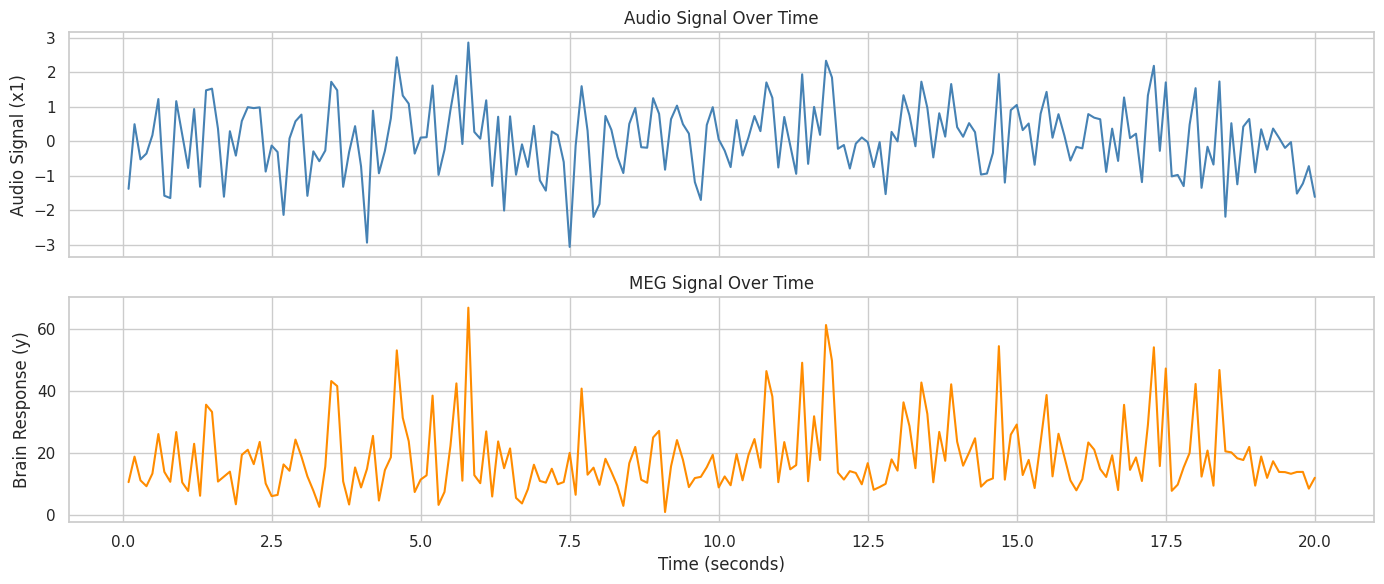

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

axs[0].plot(df['time'], df['x1'], label='x1 (Audio)', color='steelblue')
axs[0].set_ylabel("Audio Signal (x1)")
axs[0].set_title("Audio Signal Over Time")

axs[1].plot(df['time'], df['y'], label='y (MEG)', color='darkorange')
axs[1].set_ylabel("Brain Response (y)")
axs[1].set_xlabel("Time (seconds)")
axs[1].set_title("MEG Signal Over Time")

plt.tight_layout()
plt.show()


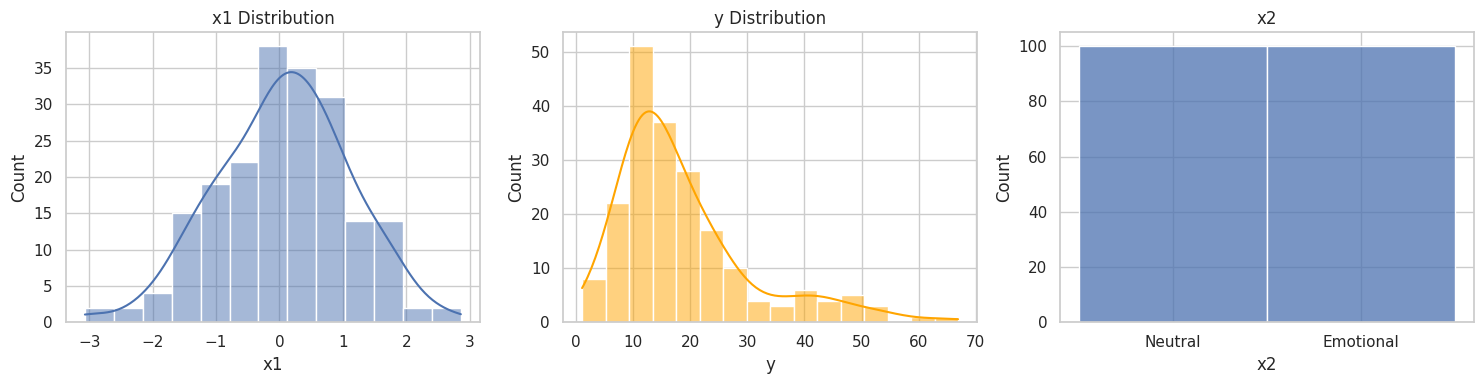

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['x1'], kde=True, ax=axs[0])
sns.histplot(df['y'], kde=True, ax=axs[1], color='orange')
sns.histplot(df['x2'], bins=2, discrete=True, ax=axs[2])
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['Neutral', 'Emotional'])
axs[0].set_title('x1 Distribution'); axs[1].set_title('y Distribution'); axs[2].set_title('x2')
plt.tight_layout()
plt.show()

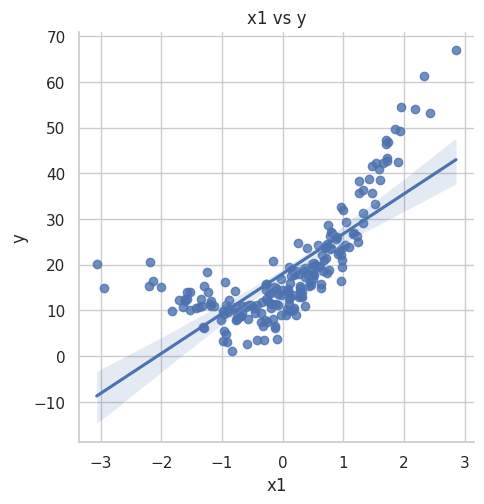

Correlation (x1 vs y): 0.7654


In [8]:
sns.lmplot(x='x1', y='y', data=df)
plt.title("x1 vs y")
plt.show()
print(f"Correlation (x1 vs y): {df['x1'].corr(df['y']):.4f}")

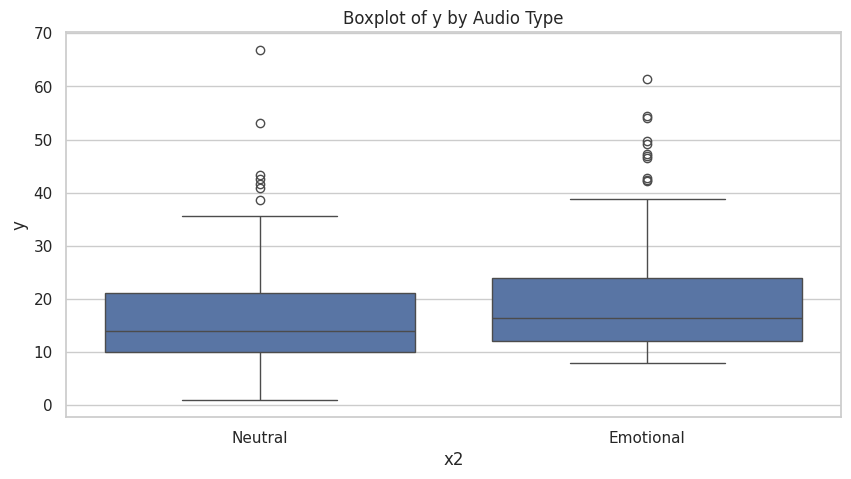

In [9]:
sns.boxplot(x='x2', y='y', data=df)
plt.xticks([0, 1], ['Neutral', 'Emotional'])
plt.title("Boxplot of y by Audio Type")
plt.show()

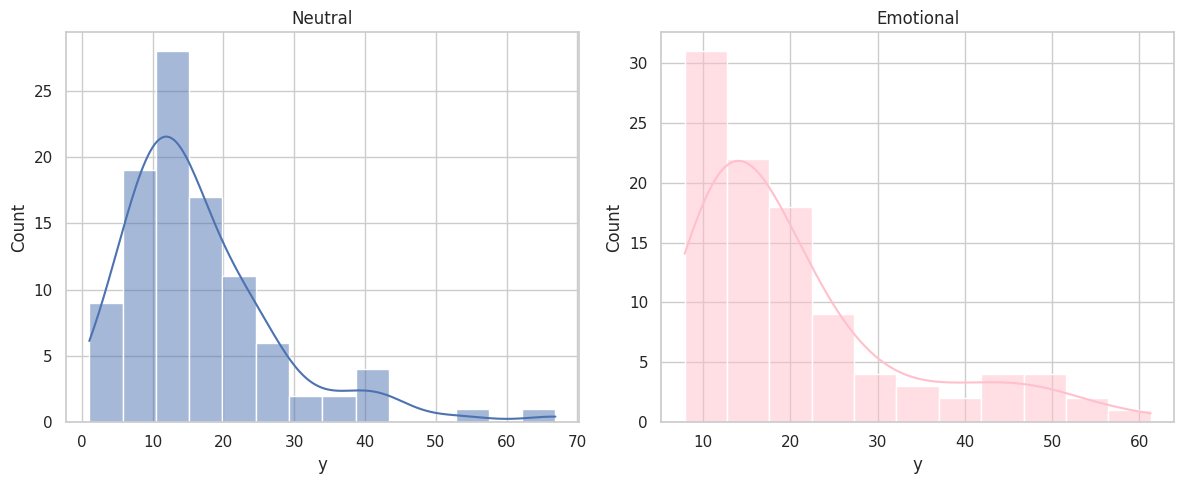

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df[df['x2'] == 0]['y'], kde=True, ax=axs[0])
sns.histplot(df[df['x2'] == 1]['y'], kde=True, color='pink', ax=axs[1])
axs[0].set_title("Neutral"); axs[1].set_title("Emotional")
plt.tight_layout()
plt.show()

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
import scipy.stats as stats

# Design matrix creator
def create_design_matrix(x1, x2, model_id):
    if model_id == 1:
        return np.column_stack((x1**3, x1**5, x2, np.ones(len(x1))))
    elif model_id == 2:
        return np.column_stack((x1, x2, np.ones(len(x1))))
    elif model_id == 3:
        return np.column_stack((x1, x1**2, x1**4, x2, np.ones(len(x1))))
    elif model_id == 4:
        return np.column_stack((x1, x1**2, x1**3, x1**5, x2, np.ones(len(x1))))
    elif model_id == 5:
        return np.column_stack((x1, x1**3, x1**4, x2, np.ones(len(x1))))

y = df['y'].values
n = len(df)
results = []

for model_id in range(1, 6):
    X = create_design_matrix(df['x1'].values, df['x2'].values, model_id)
    theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    y_pred = X @ theta_hat
    residuals = y - y_pred
    RSS = np.sum(residuals**2)
    sigma2_hat = RSS / (n - 1)
    log_likelihood = -n/2 * np.log(2 * np.pi) - n/2 * np.log(sigma2_hat) - RSS / (2 * sigma2_hat)
    k = X.shape[1]
    AIC = 2 * k - 2 * log_likelihood
    BIC = k * np.log(n) - 2 * log_likelihood
    results.append({'model_id': model_id, 'theta_hat': theta_hat, 'RSS': RSS,
                    'log_likelihood': log_likelihood, 'AIC': AIC, 'BIC': BIC,
                    'residuals': residuals})

pd.DataFrame(results)[['model_id', 'RSS', 'AIC', 'BIC']]


,model_id,RSS,AIC,BIC
0,1,11825.421353,1391.515817,1404.709087
1,2,11238.949639,1379.342582,1389.237535
2,3,1636.167607,997.936841,1014.428427
3,4,1902.062856,1030.053306,1049.843211
4,5,4928.312061,1218.464814,1234.956401


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['model_id'].plot(kind='hist', bins=20, title='model_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['RSS'].plot(kind='hist', bins=20, title='RSS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AIC'].plot(kind='hist', bins=20, title='AIC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='model_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='model_id', y='RSS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='RSS', y='AIC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='AIC', y='BIC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['RSS']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('RSS')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['AIC']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('AIC')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['BIC']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('BIC')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['model_id'].plot(kind='line', figsize=(8, 4), title='model_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['RSS'].plot(kind='line', figsize=(8, 4), title='RSS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['AIC'].plot(kind='line', figsize=(8, 4), title='AIC')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
def build_model(df, model_id):
    x1 = df['x1']
    x2 = df['x2']

    if model_id == 1:
        X = pd.DataFrame({
            'x1^3': x1**3,
            'x1^5': x1**5,
            'x2': x2
        })
    elif model_id == 2:
        X = pd.DataFrame({
            'x1': x1,
            'x2': x2
        })
    elif model_id == 3:
        X = pd.DataFrame({
            'x1': x1,
            'x1^2': x1**2,
            'x1^4': x1**4,
            'x2': x2
        })
    elif model_id == 4:
        X = pd.DataFrame({
            'x1': x1,
            'x1^2': x1**2,
            'x1^3': x1**3,
            'x1^5': x1**5,
            'x2': x2
        })
    elif model_id == 5:
        X = pd.DataFrame({
            'x1': x1,
            'x1^3': x1**3,
            'x1^4': x1**4,
            'x2': x2
        })

    X = sm.add_constant(X)
    y = df['y']
    model = sm.OLS(y, X).fit()
    return model, X, y


In [13]:
import statsmodels.api as sm
results = []

for i in range(1, 6):
    model, X, y = build_model(df, i)
    rss = np.sum(model.resid ** 2)
    results.append({
        "Model": f"Model {i}",
        "AIC": model.aic,
        "BIC": model.bic,
        "LogLikelihood": model.llf,
        "RSS": rss,
        "model_obj": model,
        "residuals": model.resid,
        "params": model.params
    })

# Redefining best_model
best_model = min(results, key=lambda x: x["AIC"])
print(f"✅ Re-selected Best Model: {best_model['Model']}")



✅ Re-selected Best Model: Model 3


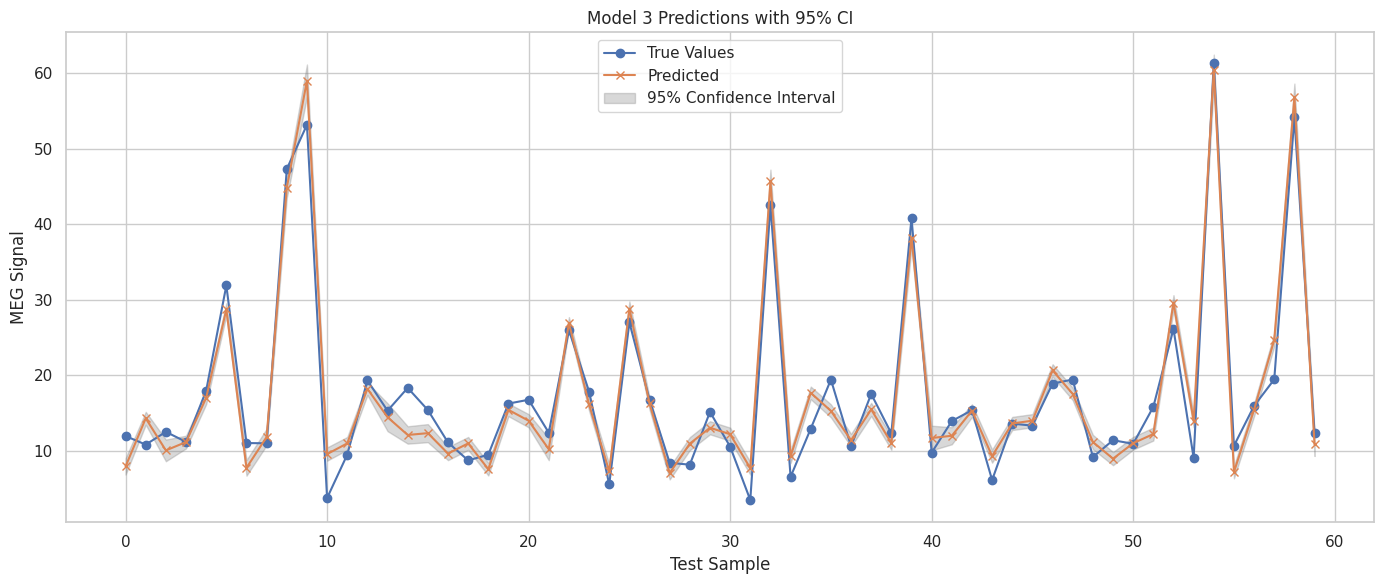

In [14]:
from sklearn.model_selection import train_test_split


best_model_id = int(best_model['Model'].split()[-1])
X, y = build_model(df, best_model_id)[1:]  # Get X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model_train = sm.OLS(y_train, X_train).fit()


predictions = model_train.get_prediction(X_test)
pred_summary = predictions.summary_frame(alpha=0.05)


plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label="True Values", marker='o')
plt.plot(pred_summary['mean'].values, label="Predicted", marker='x')
plt.fill_between(
    range(len(pred_summary)),
    pred_summary['mean_ci_lower'],
    pred_summary['mean_ci_upper'],
    color='gray', alpha=0.3, label='95% Confidence Interval'
)
plt.title(f"Model {best_model_id} Predictions with 95% CI")
plt.xlabel("Test Sample")
plt.ylabel("MEG Signal")
plt.legend()
plt.tight_layout()
plt.show()


100%|██████████| 10000/10000 [00:02<00:00, 4108.28it/s]


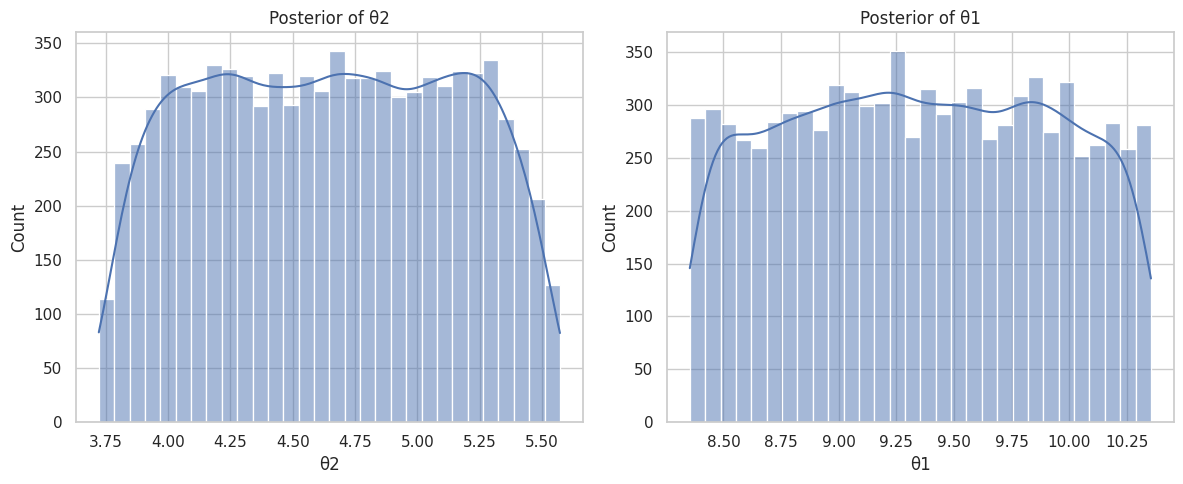

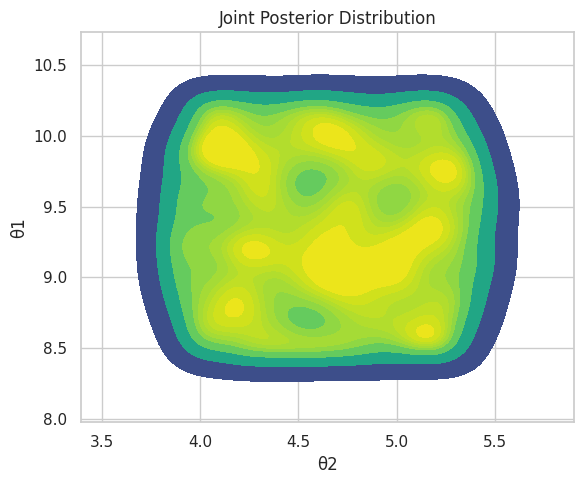

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm



x1 = X['x1'].values
x2 = X['x2'].values
n = len(x1)

X_model4 = np.column_stack([
    np.ones(n),
    x1,
    x1**2,
    x1**3,
    x1**5,
    x2
])


theta_hat = np.linalg.inv(X_model4.T @ X_model4) @ X_model4.T @ y


param_indices = np.argsort(np.abs(theta_hat[1:]))[-2:] + 1
fixed_indices = [i for i in range(len(theta_hat)) if i not in param_indices]

theta_fixed = theta_hat.copy()


param_priors = {
    i: (theta_hat[i] - 1, theta_hat[i] + 1)
    for i in param_indices
}

num_samples = 10000
epsilon = 50
accepted_params = []

for _ in tqdm(range(num_samples)):
    theta_sample = theta_fixed.copy()

    for i in param_indices:
        theta_sample[i] = np.random.uniform(*param_priors[i])


    y_sim = X_model4 @ theta_sample


    distance = np.linalg.norm(y - y_sim)

    if distance < epsilon:
        accepted_params.append([theta_sample[param_indices[0]], theta_sample[param_indices[1]]])

accepted_params = np.array(accepted_params)
param1, param2 = param_indices

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(accepted_params[:, 0], kde=True, bins=30)
plt.title(f'Posterior of θ{param1}')
plt.xlabel(f'θ{param1}')

plt.subplot(1, 2, 2)
sns.histplot(accepted_params[:, 1], kde=True, bins=30)
plt.title(f'Posterior of θ{param2}')
plt.xlabel(f'θ{param2}')

plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 5))
sns.kdeplot(
    x=accepted_params[:, 0],
    y=accepted_params[:, 1],
    fill=True, cmap="viridis"
)
plt.xlabel(f'θ{param1}')
plt.ylabel(f'θ{param2}')
plt.title('Joint Posterior Distribution')
plt.tight_layout()
plt.show()
